# Подготовительные моменты

Подключение необходимых библиотек.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from mlxtend.plotting import plot_decision_regions
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler

Создание DataFrame из xlsx-файла с данными о продуктах.

In [5]:
products = pd.read_excel("ABBREV_with_CLASS.xlsx")

# Первый взгляд на набор данных

Набор данных о продуктах содержит следующие признаки:
- `NDB_NO` - Уникальный идентификационный номер продукта в базе данных;
- `Shrt_Desc` - Краткое описание продукта;
- `Water_(g)` - Вода (г/100 г);
- `Energ_Kcal` - Энергетическая ценность пищи (ккал/100 г);
- `Protein_(g)` - Протеин (г/100 г);
- `Lipid_Tot_(g)` - Общее количество липидов (жиров) (г/100 г);
- `Ash_(g)` - Зола (г/100 г);
- `Carbohydrt_(g)` - Углеводы, по разнице (г/100 г);
- `Fiber_TD_(g)` - Общее количество пищевых волокон (г/100 г);
- `Sugar_Tot_(g)` - Общее количество сахаров (г/100 г);
- `Calcium_(mg)` - Кальций (мг/100 г);
- `Iron_(mg)` - Железо (мг/100 г);
- `Magnesium_(mg)` - Магний (мг/100 г);
- `Phosphorus_(mg)` - Фосфор (мг/100 г);
- `Potassium_(mg)` - Калий (мг/100 г);
- `Sodium_(mg)` - Натрий (мг/100 г);
- `Zinc_(mg)` - Цинк (мг/100 г);
- `Copper_mg)` - Медь (мг/100 г);
- `Manganese_(mg)` - Марганец (мг/100 г);
- `Selenium_(µg)` - Селен (мкг/100 г);
- `Vit_C_(mg)` - Витамин С (мг/100 г);
- `Thiamin_(mg)` - Тиамин (мг/100 г);
- `Riboflavin_(mg)` - Рибофлавин (мг/100 г);
- `Niacin_(mg)` - Ниацин (мг/100 г);
- `Panto_Acid_mg)` - Пантотеновая кислота (мг/100 г);
- `Vit_B6_(mg)` - Витамин В6 (мг/100 г);
- `Folate_Tot_(µg)` - Фолиевая кислота, общее количество (мкг/100 г);
- `Folic_Acid_(µg)` - Фолиевая кислота (мкг/100 г);
- `Food_Folate_(µg)` - Пищевая фолиевая кислота (мкг/100 г);
- `Folate_DFE_(µg)` - Фолиевая кислота (мкг диетического эквивалента фолиевой кислоты/100 г);
- `Choline_Tot_ (mg)` - Холин, общее количество (мг/100 г);
- `Vit_B12_(µg)` - Витамин В12 (мкг/100 г);
- `Vit_A_IU` - Витамин А (МЕ/100 г);
- `Vit_A_RAE` - Витамин А (эквивалент активности ретинола в мкг/100 г);
- `Retinol_(µg)` - Ретинол (мкг/100 г);
- `Alpha_Carot_(µg)` - Альфа-каротин (мкг/100 г);
- `Beta_Carot_(µg)` - Бета-каротин (мкг/100 г);
- `Beta_Crypt_(µg)` - Бета-криптоксантин (мкг/100 г);
- `Lycopene_(µg)` - Ликопин (мкг/100 г);
- `Lut+Zea_ (µg)` - Лютеин+зеазантин (мкг/100 г);
- `Vit_E_(mg)` - Витамин Е (альфа-токоферол) (мг/100 г);
- `Vit_D_µg` - Витамин D (мкг/100 г);
- `Vit_D_IU` - Витамин D (МЕ/100 г);
- `Vit_K_(µg)` - Витамин К (филлохинон) (мкг/100 г);
- `FA_Sat_(g)` - Насыщенные жирные кислоты (г/100 г);
- `FA_Mono_(g)` - Мононенасыщенные жирные кислоты (г/100 г);
- `FA_Poly_(g)` - Полиненасыщенные жирные кислоты (г/100 г);
- `Cholestrl_(mg)` - Холестерин (мг/100 г);
- `GmWt_1` - Величина бытового веса №1;
- `GmWt_Desc1` - Описание бытового веса №1 (например, 3 унции).
- `GmWt_2` - Величина бытового веса №2;
- `GmWt_Desc2` - Описание бытового веса №2 (например, 1 стакан).
- `Refuse_Pct` - Процент несъедобной части;
- `CLASS` - класс продуктов.

In [6]:
products

,Unnamed: 0,NDB_No,Shrt_Desc,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),...,FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_Desc1,GmWt_2,GmWt_Desc2,Refuse_Pct,CLASS
0,0,1001,"BUTTER,WITH SALT",15.87,717,0.85,81.11,2.11,0.06,0.0,...,51.368,21.021,3.043,215.0,5.00,"1 pat, (1"" sq, 1/3"" high)",14.2,1 tbsp,0.0,10
1,1,1002,"BUTTER,WHIPPED,W/ SALT",16.72,718,0.49,78.30,1.62,2.87,0.0,...,45.390,19.874,3.331,225.0,3.80,"1 pat, (1"" sq, 1/3"" high)",9.4,1 tbsp,0.0,10
2,2,1003,"BUTTER OIL,ANHYDROUS",0.24,876,0.28,99.48,0.00,0.00,0.0,...,61.924,28.732,3.694,256.0,12.80,1 tbsp,205.0,1 cup,0.0,0
3,3,1004,"CHEESE,BLUE",42.41,353,21.40,28.74,5.11,2.34,0.0,...,18.669,7.778,0.800,75.0,28.35,1 oz,17.0,1 cubic inch,0.0,10
4,4,1005,"CHEESE,BRICK",41.11,371,23.24,29.68,3.18,2.79,0.0,...,18.764,8.598,0.784,94.0,132.00,"1 cup, diced",113.0,"1 cup, shredded",0.0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8785,8785,83110,"MACKEREL,SALTED",43.00,305,18.50,25.10,13.40,0.00,0.0,...,7.148,8.320,6.210,95.0,80.00,"1 piece, (5-1/2"" x 1-1/2"" x 1/2"")",17.0,"1 cubic inch, boneless",0.0,0
8786,8786,90240,"SCALLOP,(BAY&SEA),CKD,STMD",70.25,111,20.54,0.84,2.97,5.41,0.0,...,0.218,0.082,0.222,41.0,85.00,3 oz,NaN,NaN,0.0,0
8787,8787,90480,"SYRUP,CANE",26.00,269,0.00,0.00,0.86,73.14,0.0,...,0.000,0.000,0.000,0.0,21.00,1 serving,NaN,NaN,0.0,10
8788,8788,90560,"SNAIL,RAW",79.20,90,16.10,1.40,1.30,2.00,0.0,...,0.361,0.259,0.252,50.0,85.00,3 oz,NaN,NaN,0.0,0


# Простейшая подготовка набора данных к применению метода k ближайших соседей

Сразу же удаляем столбец `Unnamed: 0`, обозначающий номер записи, и столбец `NDB_No`, содержащий уникальный идентификационный номер продукта в базе данных, так как они не имеют смысла при решении поставленной задачи.

In [5]:
products.drop(columns=["Unnamed: 0", "NDB_No"], inplace=True)
products

,Shrt_Desc,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),Calcium_(mg),...,FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_Desc1,GmWt_2,GmWt_Desc2,Refuse_Pct,CLASS
0,"BUTTER,WITH SALT",15.87,717,0.85,81.11,2.11,0.06,0.0,0.06,24.0,...,51.368,21.021,3.043,215.0,5.00,"1 pat, (1"" sq, 1/3"" high)",14.2,1 tbsp,0.0,10
1,"BUTTER,WHIPPED,W/ SALT",16.72,718,0.49,78.30,1.62,2.87,0.0,0.06,23.0,...,45.390,19.874,3.331,225.0,3.80,"1 pat, (1"" sq, 1/3"" high)",9.4,1 tbsp,0.0,10
2,"BUTTER OIL,ANHYDROUS",0.24,876,0.28,99.48,0.00,0.00,0.0,0.00,4.0,...,61.924,28.732,3.694,256.0,12.80,1 tbsp,205.0,1 cup,0.0,0
3,"CHEESE,BLUE",42.41,353,21.40,28.74,5.11,2.34,0.0,0.50,528.0,...,18.669,7.778,0.800,75.0,28.35,1 oz,17.0,1 cubic inch,0.0,10
4,"CHEESE,BRICK",41.11,371,23.24,29.68,3.18,2.79,0.0,0.51,674.0,...,18.764,8.598,0.784,94.0,132.00,"1 cup, diced",113.0,"1 cup, shredded",0.0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8785,"MACKEREL,SALTED",43.00,305,18.50,25.10,13.40,0.00,0.0,0.00,66.0,...,7.148,8.320,6.210,95.0,80.00,"1 piece, (5-1/2"" x 1-1/2"" x 1/2"")",17.0,"1 cubic inch, boneless",0.0,0
8786,"SCALLOP,(BAY&SEA),CKD,STMD",70.25,111,20.54,0.84,2.97,5.41,0.0,0.00,10.0,...,0.218,0.082,0.222,41.0,85.00,3 oz,NaN,NaN,0.0,0
8787,"SYRUP,CANE",26.00,269,0.00,0.00,0.86,73.14,0.0,73.20,13.0,...,0.000,0.000,0.000,0.0,21.00,1 serving,NaN,NaN,0.0,10
8788,"SNAIL,RAW",79.20,90,16.10,1.40,1.30,2.00,0.0,0.00,10.0,...,0.361,0.259,0.252,50.0,85.00,3 oz,NaN,NaN,0.0,0


Рассмотрим категориальные признаки и их основные числовые характеристики, среди которых краткое описание продукта и два варианта описания его бытового веса.

In [6]:
products.describe(include="object")

,Shrt_Desc,GmWt_Desc1,GmWt_Desc2
count,8790,8491,4825
unique,8787,911,921
top,"OIL,INDUSTRIAL,PALM KERNEL (HYDROGENATED),CONF...",3 oz,1 cup
freq,2,1409,298


Все категориальные признаки имеют большое множество значений, поэтому их кодирование и дальнейшее использование нецелесообразно при решении поставленной задачи. Поэтому удаляем столбцы с ними (`Shrt_Desc`, `GmWt_Desc1`, `GmWt_Desc2`).

In [7]:
products.drop(columns=["Shrt_Desc", "GmWt_Desc1", "GmWt_Desc2"], inplace=True)
products

,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),Calcium_(mg),Iron_(mg),...,Vit_D_IU,Vit_K_(µg),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_2,Refuse_Pct,CLASS
0,15.87,717,0.85,81.11,2.11,0.06,0.0,0.06,24.0,0.02,...,0.0,7.0,51.368,21.021,3.043,215.0,5.00,14.2,0.0,10
1,16.72,718,0.49,78.30,1.62,2.87,0.0,0.06,23.0,0.05,...,0.0,4.6,45.390,19.874,3.331,225.0,3.80,9.4,0.0,10
2,0.24,876,0.28,99.48,0.00,0.00,0.0,0.00,4.0,0.00,...,0.0,8.6,61.924,28.732,3.694,256.0,12.80,205.0,0.0,0
3,42.41,353,21.40,28.74,5.11,2.34,0.0,0.50,528.0,0.31,...,21.0,2.4,18.669,7.778,0.800,75.0,28.35,17.0,0.0,10
4,41.11,371,23.24,29.68,3.18,2.79,0.0,0.51,674.0,0.43,...,22.0,2.5,18.764,8.598,0.784,94.0,132.00,113.0,0.0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8785,43.00,305,18.50,25.10,13.40,0.00,0.0,0.00,66.0,1.40,...,1006.0,7.8,7.148,8.320,6.210,95.0,80.00,17.0,0.0,0
8786,70.25,111,20.54,0.84,2.97,5.41,0.0,0.00,10.0,0.58,...,2.0,0.0,0.218,0.082,0.222,41.0,85.00,NaN,0.0,0
8787,26.00,269,0.00,0.00,0.86,73.14,0.0,73.20,13.0,3.60,...,0.0,0.0,0.000,0.000,0.000,0.0,21.00,NaN,0.0,10
8788,79.20,90,16.10,1.40,1.30,2.00,0.0,0.00,10.0,3.50,...,0.0,0.1,0.361,0.259,0.252,50.0,85.00,NaN,0.0,0


Все оставшиеся признаки в том или ином виде понадобятся при решении поставленной задачи, поэтому переименуем заголовки столбцов для удобства обращения к ним.

In [8]:
products.rename(columns={
    "Water_(g)": "water_g", "Energ_Kcal": "energy_kcal", "Protein_(g)": "protein_g",
    "Lipid_Tot_(g)": "lipid_total_g", "Ash_(g)": "ash_g", "Carbohydrt_(g)": "carbohydrate_g",
    "Fiber_TD_(g)": "fiber_td_g", "Sugar_Tot_(g)": "sugar_total_g", "Calcium_(mg)": "calcium_mg",
    "Iron_(mg)": "iron_mg", "Magnesium_(mg)": "magnesium_mg", "Phosphorus_(mg)": "phosphorus_mg",
    "Potassium_(mg)": "potassium_mg", "Sodium_(mg)": "sodium_mg", "Zinc_(mg)": "zinc_mg",
    "Copper_mg)": "copper_mg", "Manganese_(mg)": "manganese_mg", "Selenium_(µg)": "selenium_ug",
    "Vit_C_(mg)": "vitamin_c_mg", "Thiamin_(mg)": "thiamin_mg", "Riboflavin_(mg)": "riboflavin_mg",
    "Niacin_(mg)": "niacin_mg", "Panto_Acid_mg)": "pantothenic_acid_mg", "Vit_B6_(mg)": "vitamin_b6_mg",
    "Folate_Tot_(µg)": "folic_total_ug", "Folic_Acid_(µg)": "folic_acid_ug", "Food_Folate_(µg)": "food_folic_ug",
    "Folate_DFE_(µg)": "folic_dfe_ug", "Choline_Tot_ (mg)": "choline_total_mg", "Vit_B12_(µg)": "vitamin_b12_ug",
    "Vit_A_IU": "vitamin_a_iu", "Vit_A_RAE": "vitamin_a_rae", "Retinol_(µg)": "retinol_ug",
    "Alpha_Carot_(µg)": "alpha_carot_ug", "Beta_Carot_(µg)": "beta_carot_ug", "Beta_Crypt_(µg)": "beta_crypt_ug",
    "Lycopene_(µg)": "lycopene_ug", "Lut+Zea_ (µg)": "lut_zea_ug", "Vit_E_(mg)": "vitamin_e_mg",
    "Vit_D_µg": "vitamin_d_ug", "Vit_D_IU": "vitamin_d_iu", "Vit_K_(µg)": "vitamin_k_ug",
    "FA_Sat_(g)": "fa_sat_g", "FA_Mono_(g)": "fa_mono_g", "FA_Poly_(g)": "fa_poly_g",
    "Cholestrl_(mg)": "cholestrl_mg", "GmWt_1": "gmwt_1", "GmWt_2": "gmwt_2",
    "Refuse_Pct": "refuse_pct", "CLASS": "product_class"
}, inplace=True)

Теперь рассмотрим количественные признаки. Так как в наборе данных представлено 50 столбцов с значимыми количественными признаками, то разделим их на 5 порций для удобства.

In [9]:
products.iloc[:, :10].describe()

,water_g,energy_kcal,protein_g,lipid_total_g,ash_g,carbohydrate_g,fiber_td_g,sugar_total_g,calcium_mg,iron_mg
count,8789.000000,8790.000000,8790.000000,8790.000000,8465.000000,8790.000000,8196.000000,6958.000000,8442.000000,8646.000000
mean,54.112218,226.317634,11.342849,10.553725,1.783468,22.127710,2.187445,8.543066,76.738214,2.699674
std,30.772854,169.877539,10.530474,15.814842,3.004609,27.270822,4.383138,14.923626,203.527453,5.687560
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.700000,91.000000,2.380000,0.950000,0.840000,0.050000,0.000000,0.000000,10.000000,0.540000
50%,63.080000,191.000000,8.000000,5.140000,1.200000,9.340000,0.700000,1.840000,21.000000,1.380000
75%,77.960000,337.000000,19.880000,13.720000,2.090000,34.910000,2.600000,9.287500,69.000000,2.600000
max,100.000000,902.000000,88.320000,100.000000,99.800000,100.000000,79.000000,99.800000,7364.000000,123.600000


In [10]:
products.iloc[:, 10:20].describe()

,magnesium_mg,phosphorus_mg,potassium_mg,sodium_mg,zinc_mg,copper_mg,manganese_mg,selenium_ug,vitamin_c_mg,thiamin_mg
count,8051.000000,8211.000000,8364.000000,8707.000000,8084.000000,7533.000000,6630.000000,7090.000000,7972.000000,8156.000000
mean,35.295988,165.142126,279.472740,312.495923,2.117438,0.195984,0.658156,15.591016,9.231134,0.223134
std,57.416785,204.704214,375.483729,943.431341,3.437209,0.582596,7.248609,30.471099,68.854696,0.523752
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,51.000000,127.000000,41.000000,0.340000,0.052000,0.015000,1.300000,0.000000,0.040000
50%,21.000000,145.000000,229.500000,88.000000,0.990000,0.090000,0.082000,10.100000,0.000000,0.084000
75%,30.000000,220.000000,336.000000,404.500000,2.920000,0.160000,0.326000,24.300000,3.500000,0.250000
max,781.000000,9918.000000,16500.000000,38758.000000,90.950000,15.050000,328.000000,1917.000000,2732.000000,23.375000


In [11]:
products.iloc[:, 20:30].describe()

,riboflavin_mg,niacin_mg,pantothenic_acid_mg,vitamin_b6_mg,folic_total_ug,folic_acid_ug,food_folic_ug,folic_dfe_ug,choline_total_mg,vitamin_b12_ug
count,8174.000000,8153.000000,6548.000000,7885.000000,7529.000000,6751.000000,7022.000000,6733.000000,4774.000000,7597.000000
mean,0.252237,3.657721,0.650989,0.291531,51.598220,23.169012,24.556109,64.275806,43.596230,1.392472
std,0.449461,4.823819,1.413303,0.485057,136.601781,114.513700,62.386069,207.360765,63.109904,4.566460
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.063000,0.552000,0.195000,0.051000,5.000000,0.000000,4.000000,4.000000,9.000000,0.000000
50%,0.170000,2.580000,0.435000,0.150000,12.000000,0.000000,9.000000,11.000000,24.750000,0.240000
75%,0.270000,5.276000,0.732250,0.390000,46.000000,0.000000,21.000000,41.000000,69.675000,1.610000
max,17.500000,127.500000,34.500000,12.000000,3786.000000,2993.000000,2340.000000,5881.000000,2403.300000,98.890000


In [12]:
products.iloc[:, 30:40].describe()

,vitamin_a_iu,vitamin_a_rae,retinol_ug,alpha_carot_ug,beta_carot_ug,beta_crypt_ug,lycopene_ug,lut_zea_ug,vitamin_e_mg,vitamin_d_ug
count,8079.000000,7255.000000,6984.000000,5532.000000,5628.000000,5520.000000,5498.000000,5475.000000,5901.000000,5528.000000
mean,735.810744,111.726120,89.770046,31.496927,221.314499,10.623913,157.039651,193.970046,1.331518,0.579269
std,3848.009267,847.905482,853.251289,321.134973,1281.280007,155.313138,1397.230145,1148.404329,4.640706,3.882702
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.120000,0.000000
50%,32.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.300000,0.000000
75%,252.500000,33.000000,12.000000,0.000000,21.000000,0.000000,0.000000,30.000000,0.800000,0.200000
max,100000.000000,30000.000000,30000.000000,14251.000000,42891.000000,6252.000000,46260.000000,19697.000000,149.400000,250.000000


In [13]:
products.iloc[:, 40:].describe()

,vitamin_d_iu,vitamin_k_ug,fa_sat_g,fa_mono_g,fa_poly_g,cholestrl_mg,gmwt_1,gmwt_2,refuse_pct,product_class
count,5579.000000,5227.000000,8441.000000,8124.000000,8125.000000,8380.000000,8490.000000,4825.000000,8740.000000,8790.000000
mean,22.990142,15.631586,3.576334,4.081006,2.288767,40.613246,96.395130,250.747668,4.964416,5.715586
std,154.614465,79.949125,6.518840,7.010760,5.215654,119.869371,84.337063,382.226774,12.088471,5.076376
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.400000,0.000000,0.000000
25%,0.000000,0.200000,0.220000,0.235750,0.220000,0.000000,29.000000,42.000000,0.000000,0.000000
50%,0.000000,1.600000,1.592000,1.938500,0.696000,4.000000,85.000000,164.000000,0.000000,10.000000
75%,6.000000,5.200000,4.345000,5.115000,2.081000,67.000000,130.000000,305.000000,0.000000,10.000000
max,10000.000000,1714.500000,95.600000,83.689000,74.623000,3100.000000,1184.000000,5717.000000,81.000000,11.000000


Минимальное значение почти для всех признаков равно 0. Также, судя по количество непустных записей в наборе данных присутствуют пропуски. Зная, что значениям признаков соотвествуют измерения количества тех или иных веществ, содержащихся или не содержащихся в продуктах, можно все пропуски заменить на 0, что равносильно отсутствию того или иного вещества в очередном продукте.

In [14]:
products.fillna(0, inplace=True)
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 50 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   water_g              8790 non-null   float64
 1   energy_kcal          8790 non-null   int64  
 2   protein_g            8790 non-null   float64
 3   lipid_total_g        8790 non-null   float64
 4   ash_g                8790 non-null   float64
 5   carbohydrate_g       8790 non-null   float64
 6   fiber_td_g           8790 non-null   float64
 7   sugar_total_g        8790 non-null   float64
 8   calcium_mg           8790 non-null   float64
 9   iron_mg              8790 non-null   float64
 10  magnesium_mg         8790 non-null   float64
 11  phosphorus_mg        8790 non-null   float64
 12  potassium_mg         8790 non-null   float64
 13  sodium_mg            8790 non-null   float64
 14  zinc_mg              8790 non-null   float64
 15  copper_mg            8790 non-null   f

Теперь посмотрим, на какие классы разделены продукты — в наборе данных представлено 4 класса продуктов.

In [15]:
products.product_class.value_counts()

,count
product_class,
0,3428
10,3362
11,1462
1,538


Отделение целевого признака — класса продуктов.

In [16]:
y = products.product_class
y

,product_class
0,10
1,10
2,0
3,10
4,10
...,...
8785,0
8786,0
8787,10
8788,0


Копирование набора данных и удаление целевого признака из него.

In [17]:
X = products.drop(columns=["product_class"])
X

,water_g,energy_kcal,protein_g,lipid_total_g,ash_g,carbohydrate_g,fiber_td_g,sugar_total_g,calcium_mg,iron_mg,...,vitamin_d_ug,vitamin_d_iu,vitamin_k_ug,fa_sat_g,fa_mono_g,fa_poly_g,cholestrl_mg,gmwt_1,gmwt_2,refuse_pct
0,15.87,717,0.85,81.11,2.11,0.06,0.0,0.06,24.0,0.02,...,0.0,0.0,7.0,51.368,21.021,3.043,215.0,5.00,14.2,0.0
1,16.72,718,0.49,78.30,1.62,2.87,0.0,0.06,23.0,0.05,...,0.0,0.0,4.6,45.390,19.874,3.331,225.0,3.80,9.4,0.0
2,0.24,876,0.28,99.48,0.00,0.00,0.0,0.00,4.0,0.00,...,0.0,0.0,8.6,61.924,28.732,3.694,256.0,12.80,205.0,0.0
3,42.41,353,21.40,28.74,5.11,2.34,0.0,0.50,528.0,0.31,...,0.5,21.0,2.4,18.669,7.778,0.800,75.0,28.35,17.0,0.0
4,41.11,371,23.24,29.68,3.18,2.79,0.0,0.51,674.0,0.43,...,0.5,22.0,2.5,18.764,8.598,0.784,94.0,132.00,113.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8785,43.00,305,18.50,25.10,13.40,0.00,0.0,0.00,66.0,1.40,...,25.2,1006.0,7.8,7.148,8.320,6.210,95.0,80.00,17.0,0.0
8786,70.25,111,20.54,0.84,2.97,5.41,0.0,0.00,10.0,0.58,...,0.0,2.0,0.0,0.218,0.082,0.222,41.0,85.00,0.0,0.0
8787,26.00,269,0.00,0.00,0.86,73.14,0.0,73.20,13.0,3.60,...,0.0,0.0,0.0,0.000,0.000,0.000,0.0,21.00,0.0,0.0
8788,79.20,90,16.10,1.40,1.30,2.00,0.0,0.00,10.0,3.50,...,0.0,0.0,0.1,0.361,0.259,0.252,50.0,85.00,0.0,0.0


Разделение набора данных на тренировочную и тестовую выборки.

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Классификация методом k ближайших соседей

Обучим классификатор `KNeighborsClassifier` на тренировочной выборке и посмотрим точность.

In [19]:
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.807356844899507

Предскажем классы продуктов тестовой выборки и посмотрим результаты для каждого из классов.

In [20]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.81      0.83      1045
           1       0.64      0.61      0.62       158
          10       0.79      0.83      0.81      1018
          11       0.77      0.82      0.80       416

    accuracy                           0.81      2637
   macro avg       0.77      0.77      0.77      2637
weighted avg       0.81      0.81      0.81      2637



Исходя из посчитанных значений метрик, чем больше продуктов относится к классу, тем лучше предсказывается принадлежность продуктов к данному классу. Лучше всего был предсказан класс `0`, содержащий наибольшее количество продуктов. Хуже всего был предсказан класс `1`, содержащий наименьшее количество продуктов.

Также, визуализируем результат работы классификатора с помощью матрицы спутанности.

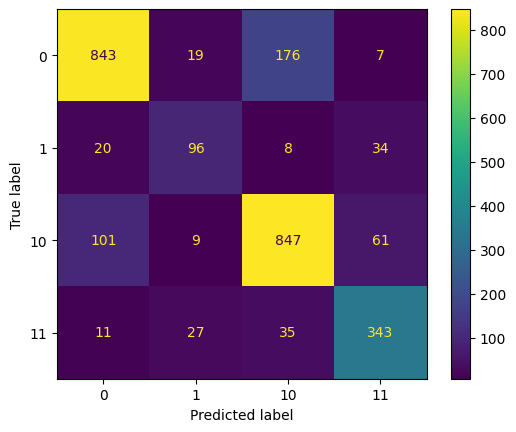

In [23]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

Видно, что чаще всего неверно определяются продукты классов `0` и `10`, меняясь местами. Значит, продукты этих классов достаточно похожи. Также, значительное число продуктов классов `1` и `10` определено в класс `11`.

# Нормализация с помощью StandardScaler и MinMaxScaler

Нормализация тренировочной и тестовой выборок с помощью `StandardScaler`.

In [21]:
standard_scaler = StandardScaler()
X_train_st = standard_scaler.fit_transform(X_train)
X_test_st = standard_scaler.transform(X_test)

Нормализация тренировочной и тестовой выборок с помощью `MinMaxScaler`.

In [22]:
min_max_scaler = MinMaxScaler()
X_train_mm = min_max_scaler.fit_transform(X_train)
X_test_mm = min_max_scaler.transform(X_test)

# Применение метода k ближайших соседей к нормализованным данным

Обучим классификатор `KNeighborsClassifier` на тренировочной выборке с нормализацией `StandardScaler` и посмотрим точность.

In [24]:
clf = KNeighborsClassifier()
clf.fit(X_train_st, y_train)
clf.score(X_test_st, y_test)

0.8752370117557831

Предскажем классы продуктов тестовой выборки и посмотрим результаты для каждого из классов.

In [25]:
y_pred = clf.predict(X_test_st)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.88      0.90      1045
           1       0.73      0.70      0.71       158
          10       0.88      0.89      0.89      1018
          11       0.84      0.88      0.86       416

    accuracy                           0.88      2637
   macro avg       0.84      0.84      0.84      2637
weighted avg       0.88      0.88      0.88      2637



Продукты точнее распределились по классам, но описаннная ранне закономерность сохранилась.

Также, визуализируем результат работы классификатора с помощью матрицы спутанности.

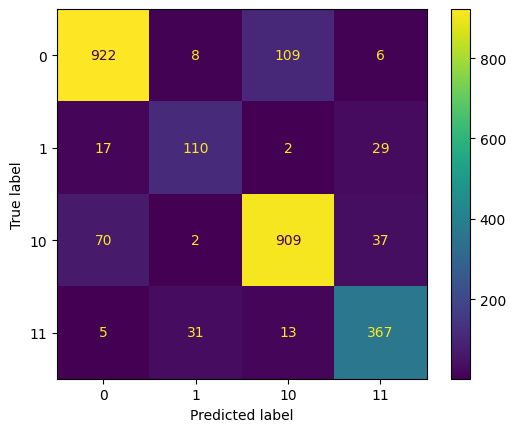

In [26]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

Ситуация улучшилась, но описанные ранее закономерности сохранились.

Обучим классификатор `KNeighborsClassifier` на тренировочной выборке с нормализацией `MinMaxScaler` и посмотрим точность.

In [27]:
clf = KNeighborsClassifier()
clf.fit(X_train_mm, y_train)
clf.score(X_test_mm, y_test)

0.8915434205536594

Предскажем классы продуктов тестовой выборки и посмотрим результаты для каждого из классов.

In [28]:
y_pred = clf.predict(X_test_mm)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.88      0.90      1045
           1       0.77      0.79      0.78       158
          10       0.88      0.91      0.90      1018
          11       0.91      0.91      0.91       416

    accuracy                           0.89      2637
   macro avg       0.87      0.87      0.87      2637
weighted avg       0.89      0.89      0.89      2637



Общая точность почти не изменилась, но важнее то, что заметно увеличилась точность определения продуктов классов `1` и `11`.

Также, визуализируем результат работы классификатора с помощью матрицы спутанности.

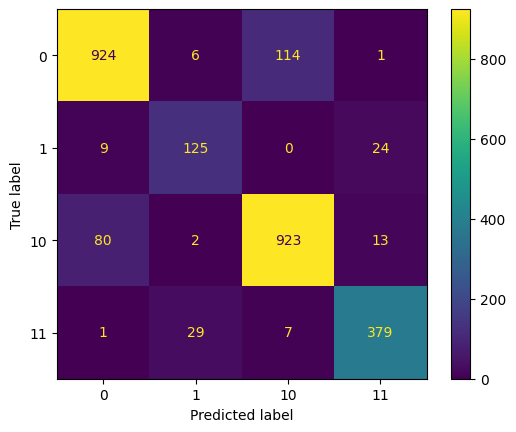

In [29]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

По сравнению с StandardScaler, стали больше путаться продукты классов `0` и `10`, но `1` и `11` определились точнее.

Результаты с нормализацией значительно лучше. Будем считать, что с использованием `MinMaxScaler` точность выше, чем с использованием `StandardScaler`, так как для продуктов всех классов она почти одинакова и наиболее высокая, за исключением класса 1, продуктов которого в наборе данных меньше всех остальных.

# Подбор значений гиперпараметров с помощью GridSearchCV

Подберём количество соседей и метрику с помощью алгоритма `GridSearchCV`, который рассматривает все возможные комбинации значений этих двух гиперпараметров и выбирает такие, с которыми была достигнута наибольшая точность.

In [30]:
best_clf = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid={"n_neighbors": range(1, 30), "metric": ["l1", "l2"]}
)
best_clf.fit(X_train_mm, y_train)
best_clf.score(X_test_mm, y_test)

0.912779673871824

Посмотрим, какие значения гиперпараметров оказались наилучшими.

In [31]:
best_clf.best_params_

{'metric': 'l1', 'n_neighbors': 5}

Наилучшими значениями гиперпараметров оказываются метрика Манхэттен и 5 соседей.

Предскажем классы продуктов тестовой выборки и посмотрим результаты для каждого из классов.

In [32]:
y_pred = best_clf.predict(X_test_mm)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      1045
           1       0.82      0.85      0.84       158
          10       0.91      0.92      0.91      1018
          11       0.93      0.93      0.93       416

    accuracy                           0.91      2637
   macro avg       0.90      0.90      0.90      2637
weighted avg       0.91      0.91      0.91      2637



Точность для каждого отдельного класса продуктов стала заметно выше. Класс `1` по-прежнему определяется хуже всех.

Также, визуализируем результат работы классификатора с помощью матрицы спутанности.

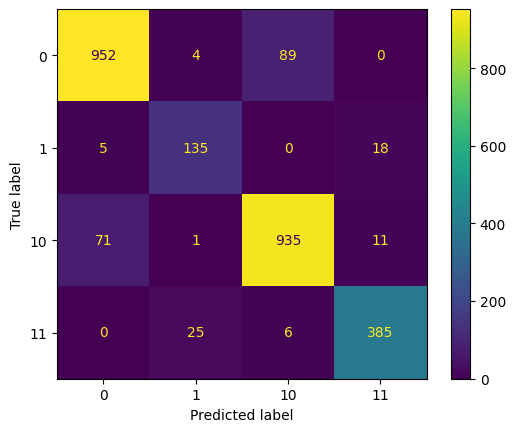

In [33]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

Общая ситуация не изменилась, но неточностей стало значительно меньше.

Таким образом, достигнут наилучший результат предсказания без каких-либо дополнительных действий с признаками.

# Краткий вывод о методе k ближайших соседей

Таким образом, к достоинстам метода k ближайших соседей можно отнести его простоту реализации и интерпретации, устойчивость к выбросам и разнородности значений каждого признака. К недостаткам можно отнести длительные вычисления, так как алгоритму требуется посчитать расстояние между каждой возможной парой объектов, и тот факт, что алгоритм никак не обобщает предыдущий опыт классификации. На данном наборе данных метод k ближайших соседей заметно "путает" некоторые классы сходих продуктов. Также, алгоритм затрачивает достаточно много вычислительных ресурсов, так как считаются расстояния между значениями 49 признаков каждого продукта, что сравнительно много.

# Другие способы подготовки набора данных для классификации

## Удаление сильно коррелирующих признаков, чтобы оставался только один из таких

Найдём все пары признаков, для которых коэффициент корреляции больше 0,7. Индексами полученной таблицы будут являться названия сильно коррелирующих признаков, столбец `p_class_corr` содержит коэффициент корреляции для данного и целевого признаков, столбец `feature_corr` содержит коэффициент корреляции для данной пары признаков, столбец `feature_name` содержит название парного сильно коррелирующего признака.

In [34]:
p_corr = products.corr()
p_strong_corr = p_corr[((p_corr > 0.7) & (p_corr < 1.0)).any(axis=1)]
p_strong_corr_info = pd.concat([
    p_strong_corr.product_class.to_frame("p_class_corr"),
    p_strong_corr[(p_corr < 1.0)].max(axis=1).to_frame("feature_corr"),
    p_strong_corr[(p_corr < 1.0)].idxmax(axis=1).to_frame("feature_name")
], axis=1)
p_strong_corr_info

,p_class_corr,feature_corr,feature_name
energy_kcal,-0.033372,0.806677,lipid_total_g
lipid_total_g,-0.172242,0.868514,fa_mono_g
ash_g,0.019317,0.813908,sodium_mg
sodium_mg,0.058791,0.813908,ash_g
riboflavin_mg,-0.001239,0.739320,niacin_mg
niacin_mg,-0.143128,0.739320,riboflavin_mg
vitamin_b6_mg,-0.066621,0.714621,niacin_mg
folic_total_ug,0.143842,0.892511,folic_dfe_ug
folic_acid_ug,0.124158,0.950626,folic_dfe_ug
folic_dfe_ug,0.114846,0.950626,folic_acid_ug


Исходя из данной таблицы, следует удалить следующие признаки:
- `fa_sat_g`, `fa_mono_g` и `fa_poly_g` сильно коррелируют с `lipid_total_g`, с которым в свою очередь сильно коррелирует `energy_kcal`, а так как его коэффициент корреляции с классом продукта выше, то оставляем именно этот признак;
- из `ash_g` и `sodium_mg` оставляем признак `sodium_mg`, так как он лучше коррелирует с классом продукта;
- из `riboflavin_mg`, `niacin_mg` и `vitamin_b6_mg` оставляем признак `riboflavin_mg`, так как он лучше остальных коррелирует с классом продукта;
- из `folic_total_ug`, `folic_acid_ug` и `folic_dfe_ug` оставляем признак `folic_total_ug`, так как он лучше остальных коррелирует с классом продукта;
- из `vitamin_a_ui`, `vitamin_a_rae` и `retinol_ug` оставляем признак `vitamin_a_ui`, так как он лучше остальных коррелирует с классом продукта;
- из `vitamin_d_ug` и `vitamin_d_iu` оставляем признак `vitamin_d_iu`, так как он лучше коррелирует с классом продукта.

После описанных действий таблица сильно коррелирующих признаков выглядит следующим образом:

In [35]:
features_to_delete = [
    "fa_sat_g", "fa_mono_g", "fa_poly_g", "lipid_total_g", "ash_g", "niacin_mg", "vitamin_b6_mg",
    "folic_acid_ug", "folic_dfe_ug", "vitamin_a_rae", "retinol_ug", "vitamin_d_ug"
]
p_strong_corr_info.drop(features_to_delete)

,p_class_corr,feature_corr,feature_name
energy_kcal,-0.033372,0.806677,lipid_total_g
sodium_mg,0.058791,0.813908,ash_g
riboflavin_mg,-0.001239,0.739320,niacin_mg
folic_total_ug,0.143842,0.892511,folic_dfe_ug
vitamin_a_iu,0.011553,0.757862,vitamin_a_rae
vitamin_d_iu,-0.004505,0.999986,vitamin_d_ug


Создадим копию набора данных c отделённым целевым признаком, где будут удалены вышеописанные столбцы.

In [36]:
X_1 = X.drop(columns=features_to_delete)
X_1

,water_g,energy_kcal,protein_g,carbohydrate_g,fiber_td_g,sugar_total_g,calcium_mg,iron_mg,magnesium_mg,phosphorus_mg,...,beta_crypt_ug,lycopene_ug,lut_zea_ug,vitamin_e_mg,vitamin_d_iu,vitamin_k_ug,cholestrl_mg,gmwt_1,gmwt_2,refuse_pct
0,15.87,717,0.85,0.06,0.0,0.06,24.0,0.02,2.0,24.0,...,0.0,0.0,0.0,2.32,0.0,7.0,215.0,5.00,14.2,0.0
1,16.72,718,0.49,2.87,0.0,0.06,23.0,0.05,1.0,24.0,...,6.0,0.0,13.0,1.37,0.0,4.6,225.0,3.80,9.4,0.0
2,0.24,876,0.28,0.00,0.0,0.00,4.0,0.00,0.0,3.0,...,0.0,0.0,0.0,2.80,0.0,8.6,256.0,12.80,205.0,0.0
3,42.41,353,21.40,2.34,0.0,0.50,528.0,0.31,23.0,387.0,...,0.0,0.0,0.0,0.25,21.0,2.4,75.0,28.35,17.0,0.0
4,41.11,371,23.24,2.79,0.0,0.51,674.0,0.43,24.0,451.0,...,0.0,0.0,0.0,0.26,22.0,2.5,94.0,132.00,113.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8785,43.00,305,18.50,0.00,0.0,0.00,66.0,1.40,60.0,254.0,...,0.0,0.0,0.0,2.38,1006.0,7.8,95.0,80.00,17.0,0.0
8786,70.25,111,20.54,5.41,0.0,0.00,10.0,0.58,37.0,426.0,...,0.0,0.0,0.0,0.00,2.0,0.0,41.0,85.00,0.0,0.0
8787,26.00,269,0.00,73.14,0.0,73.20,13.0,3.60,10.0,8.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,21.00,0.0,0.0
8788,79.20,90,16.10,2.00,0.0,0.00,10.0,3.50,250.0,272.0,...,0.0,0.0,0.0,5.00,0.0,0.1,50.0,85.00,0.0,0.0


Разделение набора данных на тренировочную и тестовую выборки с теми же параметрами.

In [37]:
X_train_1, X_test_1, y_train, y_test = train_test_split(X_1, y, test_size=0.3, random_state=0)

Нормализация тренировочной и тестовой выборок с помощью `MinMaxScaler`.

In [38]:
X_train_mm_1 = min_max_scaler.fit_transform(X_train_1)
X_test_mm_1 = min_max_scaler.transform(X_test_1)

Обучим классификатор `KNeighborsClassifier` на тренировочной выборке с наилучшими значениями гиперпараметров, которые были найдены с помощью `GridSearchCV` (`n_neighbors=5` и `metric=l1`) и посмотрим точность.

In [39]:
clf = KNeighborsClassifier(n_neighbors=5, metric="l1")
clf.fit(X_train_mm_1, y_train)
clf.score(X_test_mm_1, y_test)

0.9146757679180887

По сравнению с лучшим результатом без каких-либо дополнительных действий с признаками, точность осталась прежней.

Предскажем классы продуктов тестовой выборки и посмотрим результаты для каждого из классов.

In [40]:
y_pred = clf.predict(X_test_mm_1)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92      1045
           1       0.80      0.84      0.82       158
          10       0.92      0.92      0.92      1018
          11       0.93      0.91      0.92       416

    accuracy                           0.91      2637
   macro avg       0.89      0.90      0.90      2637
weighted avg       0.92      0.91      0.91      2637



Также, визуализируем результат работы классификатора с помощью матрицы спутанности.

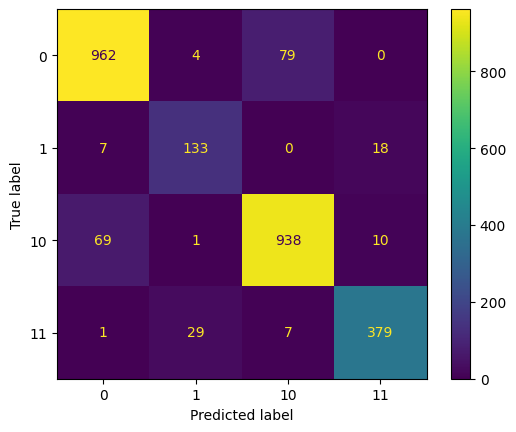

In [41]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

Таким образом, благодаря удалению сильно коррелирующих признаков, чтобы оставался только один из таких, общая точность предсказания незначительно возросла (на 0,6%).

## Объединение связанных по смыслу групп признаков в один

Ещё раз посмотрим на все признаки и выделим в них какие-либо группы связанных по смыслу признаков.

In [42]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   water_g              8790 non-null   float64
 1   energy_kcal          8790 non-null   int64  
 2   protein_g            8790 non-null   float64
 3   lipid_total_g        8790 non-null   float64
 4   ash_g                8790 non-null   float64
 5   carbohydrate_g       8790 non-null   float64
 6   fiber_td_g           8790 non-null   float64
 7   sugar_total_g        8790 non-null   float64
 8   calcium_mg           8790 non-null   float64
 9   iron_mg              8790 non-null   float64
 10  magnesium_mg         8790 non-null   float64
 11  phosphorus_mg        8790 non-null   float64
 12  potassium_mg         8790 non-null   float64
 13  sodium_mg            8790 non-null   float64
 14  zinc_mg              8790 non-null   float64
 15  copper_mg            8790 non-null   f

Следующие группы признаков могут быть объединены:
- `folic_total_ug`, `folic_acid_ug`, `food_folic_ug` и `folic_dfe_ug` относятся к фолиевой кислоте и образуют признак `folic`;
- `vitamin_a_iu` и `vitamin_a_rae` относятся к витамину A и образуют признак `vitamin_a`;
- `vitamin_d_ug` и `vitamin_d_iu` относятся к витамину D и образуют признак `vitamin_d`;
- `fa_sat_g`, `fa_mono_g` и `fa_poly_g` относятся к насыщенным жирным кислотам и образуют признак `fa`;
- `gmwt_1` и `gmwt_2` относятся к бытовому весу и образуют признак `gmwt`.

In [43]:
f_folic = ["folic_total_ug", "folic_acid_ug", "food_folic_ug", "folic_dfe_ug"]
f_vitamin_a = ["vitamin_a_iu", "vitamin_a_rae"]
f_vitamin_d = ["vitamin_d_ug", "vitamin_d_iu"]
f_fa = ["fa_sat_g", "fa_mono_g", "fa_poly_g"]
f_gmwt = ["gmwt_1", "gmwt_2"]
X_2 = X.copy()
X_2["folic"] = X_2[f_folic].mean(axis=1).round(3)
X_2["vitamin_a"] = X_2[f_vitamin_a].mean(axis=1).round(3)
X_2["vitamin_d"] = X_2[f_vitamin_d].mean(axis=1).round(3)
X_2["fa"] = X_2[f_fa].mean(axis=1).round(3)
X_2["gmwt"] = X_2[f_gmwt].mean(axis=1).round(3)
X_2.drop(columns=f_folic + f_vitamin_a + f_vitamin_d + f_fa + f_gmwt, inplace=True)
X_2

,water_g,energy_kcal,protein_g,lipid_total_g,ash_g,carbohydrate_g,fiber_td_g,sugar_total_g,calcium_mg,iron_mg,...,lut_zea_ug,vitamin_e_mg,vitamin_k_ug,cholestrl_mg,refuse_pct,folic,vitamin_a,vitamin_d,fa,gmwt
0,15.87,717,0.85,81.11,2.11,0.06,0.0,0.06,24.0,0.02,...,0.0,2.32,7.0,215.0,0.0,2.25,1591.5,0.00,25.144,9.600
1,16.72,718,0.49,78.30,1.62,2.87,0.0,0.06,23.0,0.05,...,13.0,1.37,4.6,225.0,0.0,3.00,1575.5,0.00,22.865,6.600
2,0.24,876,0.28,99.48,0.00,0.00,0.0,0.00,4.0,0.00,...,0.0,2.80,8.6,256.0,0.0,0.00,1954.5,0.00,31.450,108.900
3,42.41,353,21.40,28.74,5.11,2.34,0.0,0.50,528.0,0.31,...,0.0,0.25,2.4,75.0,0.0,27.00,459.5,10.75,9.082,22.675
4,41.11,371,23.24,29.68,3.18,2.79,0.0,0.51,674.0,0.43,...,0.0,0.26,2.5,94.0,0.0,15.00,686.0,11.25,9.382,122.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8785,43.00,305,18.50,25.10,13.40,0.00,0.0,0.00,66.0,1.40,...,0.0,2.38,7.8,95.0,0.0,11.25,102.0,515.60,7.226,48.500
8786,70.25,111,20.54,0.84,2.97,5.41,0.0,0.00,10.0,0.58,...,0.0,0.00,0.0,41.0,0.0,15.00,3.5,1.00,0.174,42.500
8787,26.00,269,0.00,0.00,0.86,73.14,0.0,73.20,13.0,3.60,...,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.000,10.500
8788,79.20,90,16.10,1.40,1.30,2.00,0.0,0.00,10.0,3.50,...,0.0,5.00,0.1,50.0,0.0,4.50,65.0,0.00,0.291,42.500


Разделение набора данных на тренировочную и тестовую выборки с теми же параметрами.

In [44]:
X_train_2, X_test_2, y_train, y_test = train_test_split(X_2, y, test_size=0.3, random_state=0)

Нормализация тренировочной и тестовой выборок с помощью `MinMaxScaler`.

In [45]:
X_train_mm_2 = min_max_scaler.fit_transform(X_train_2)
X_test_mm_2 = min_max_scaler.transform(X_test_2)

Обучим классификатор `KNeighborsClassifier` на тренировочной выборке с наилучшими значениями гиперпараметров, которые были найдены с помощью `GridSearchCV` (`n_neighbors=5` и `metric=l1`) и посмотрим точность.

In [46]:
clf = KNeighborsClassifier(n_neighbors=5, metric="l1")
clf.fit(X_train_mm_2, y_train)
clf.score(X_test_mm_2, y_test)

0.912779673871824

По сравнению с лучшим результатом без каких-либо дополнительных действий с признаками, точность осталась прежней.

Предскажем классы продуктов тестовой выборки и посмотрим результаты для каждого из классов.

In [47]:
y_pred = clf.predict(X_test_mm_2)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92      1045
           1       0.80      0.84      0.81       158
          10       0.91      0.92      0.92      1018
          11       0.93      0.92      0.93       416

    accuracy                           0.91      2637
   macro avg       0.89      0.90      0.89      2637
weighted avg       0.91      0.91      0.91      2637



Также, визуализируем результат работы классификатора с помощью матрицы спутанности.

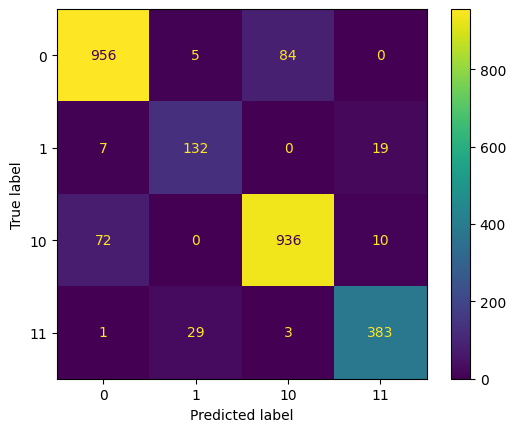

In [48]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

Таким образом, благодаря объединению связанных по смыслу групп признаков в один, общая точность предсказания незначительно снизилась (на 0,3%).

## Многократный выбор случайного поднабора признаков

В цикле выбираются 7 случайных признаков, полученный набор данных разделяется на тренировочную и тестовую выборки, которые нормализуются с помощью `MinMaxScaler`. Обучается классификатор `KNeighborsClassifier`, и, если достигнутая точность наибольшая, то предсказываются классы продуктов тестовой выборки и результаты сохраняются. Цикл выполняется 1000 раз.

In [49]:
best_score = 0
best_report = None
best_matrix = None
best_features = None
for _ in range(1000):
    X_3 = X.sample(7, axis=1)
    X_train_3, X_test_3, y_train, y_test = train_test_split(X_3, y, test_size=0.3, random_state=0)
    X_train_mm_3 = min_max_scaler.fit_transform(X_train_3)
    X_test_mm_3 = min_max_scaler.transform(X_test_3)
    clf = KNeighborsClassifier(n_neighbors=5, metric="l1")
    clf.fit(X_train_mm_3, y_train)
    clf_score = clf.score(X_test_mm_3, y_test)
    if clf_score > best_score:
        best_score = clf_score
        y_pred = clf.predict(X_test_mm_3)
        best_report = classification_report(y_test, y_pred)
        best_matrix = confusion_matrix(y_test, y_pred)
        best_features = X_3.columns.to_list()

По сравнению с лучшим результатом без каких-либо дополнительных действий с признаками, точность возрастает на 3-4%.

In [50]:
best_score

0.9495638983693592

Посмотрим результаты предсказания для каждого из классов.

In [51]:
print(best_report)

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1045
           1       0.86      0.96      0.91       158
          10       0.98      0.91      0.95      1018
          11       0.98      0.94      0.96       416

    accuracy                           0.95      2637
   macro avg       0.94      0.95      0.94      2637
weighted avg       0.95      0.95      0.95      2637



Также, визуализируем результат работы классификатора с помощью матрицы спутанности.

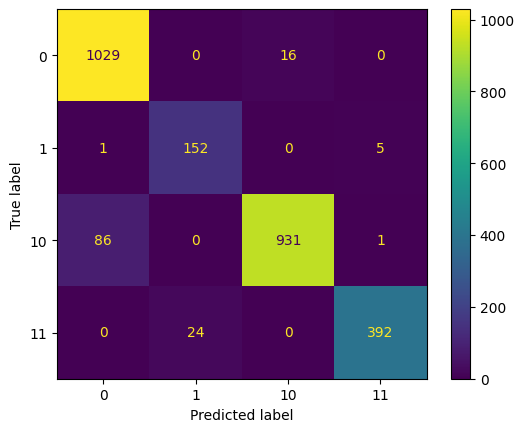

In [52]:
ConfusionMatrixDisplay(best_matrix, display_labels=clf.classes_).plot();

Данный результат был достигнут с использованием выборки из следующих признаков:

In [53]:
best_features

['manganese_mg',
 'sugar_total_g',
 'vitamin_a_iu',
 'selenium_ug',
 'vitamin_k_ug',
 'calcium_mg',
 'water_g']

Таким образом, благодаря многократному выбору случайного поднабора признаков, общая точность предсказания от запуска к запуску значительно возрастает (на 2-3%).

## Уменьшение размерности методом главных компонент

Применяем метод главных компонент с количеством выделяемых признаков 2 к нормализованным с помощью `MinMaxScaler` тренировочной и тестовой выборкам.

In [54]:
pca = PCA(2)
X_train_4 = pca.fit_transform(X_train_mm)
X_test_4 = pca.transform(X_test_mm)

Обучим классификатор `KNeighborsClassifier` на тренировочной выборке с наилучшими значениями гиперпараметров, которые были найдены с помощью `GridSearchCV` (`n_neighbors=5` и `metric=l1`) и посмотрим точность.

In [55]:
clf = KNeighborsClassifier(n_neighbors=5, metric="l1")
clf.fit(X_train_4, y_train)
clf.score(X_test_4, y_test)

0.8031854379977247

По сравнению с лучшим результатом без каких-либо дополнительных действий с признаками, точность снизилась на 11%.

Предскажем классы продуктов тестовой выборки и посмотрим результаты для каждого из классов.

In [56]:
y_pred = clf.predict(X_test_4)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.78      0.81      1045
           1       0.61      0.51      0.56       158
          10       0.79      0.85      0.82      1018
          11       0.82      0.86      0.84       416

    accuracy                           0.80      2637
   macro avg       0.76      0.75      0.76      2637
weighted avg       0.80      0.80      0.80      2637



Также, визуализируем результат работы классификатора с помощью матрицы спутанности.

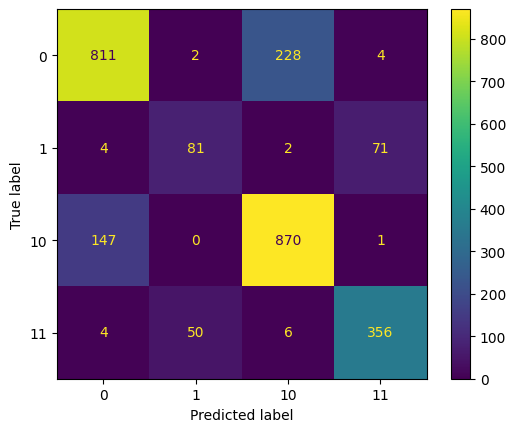

In [57]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

Благодаря уменьшению размерности можно визуализировать результат классификации на плоскости.

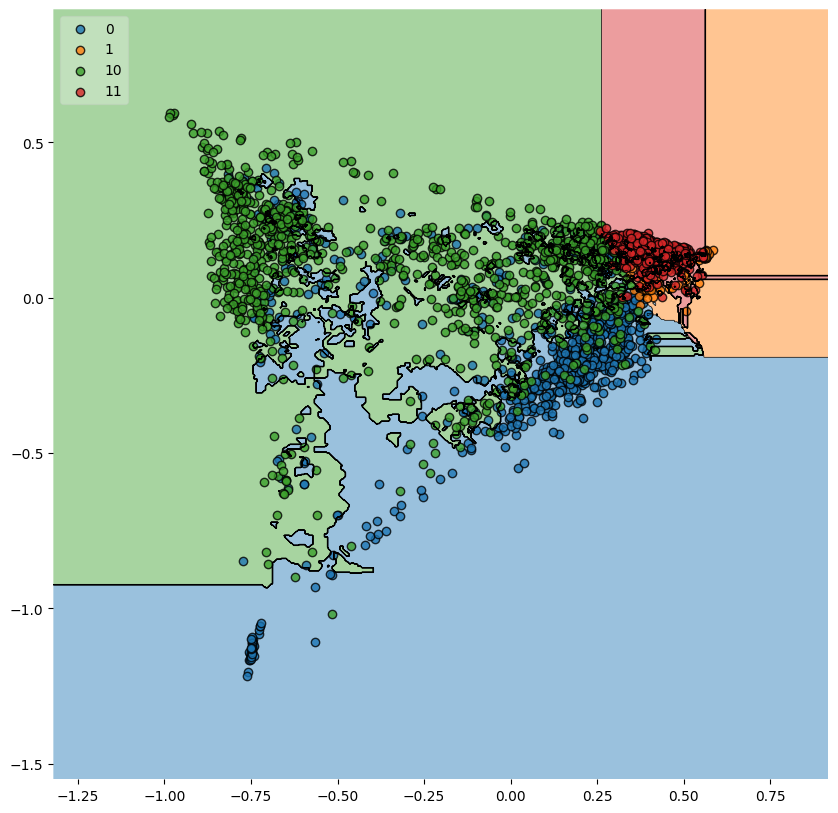

In [58]:
plt.figure(figsize=(10, 10))
plot_decision_regions(X_test_4, y_test.to_numpy(), clf, zoom_factor=3.0, legend=2, markers="o");

Таким образом, благодаря уменьшению размерности методом главных компонент, общая точность предсказания значительно снизилась (на 10%).

## Только вода и сахар

Так как основными и простейшими веществами, содержащимися в пищевых продуктах являются вода и сахар, то создадим копию набора данных c отделённым целевым признаком, где будут только признаки `water_g` и `sugar_total_g`.

In [59]:
X_5 = X[["water_g", "sugar_total_g"]]
X_5

,water_g,sugar_total_g
0,15.87,0.06
1,16.72,0.06
2,0.24,0.00
3,42.41,0.50
4,41.11,0.51
...,...,...
8785,43.00,0.00
8786,70.25,0.00
8787,26.00,73.20
8788,79.20,0.00


Разделение набора данных на тренировочную и тестовую выборки с теми же параметрами.

In [60]:
X_train_5, X_test_5, y_train, y_test = train_test_split(X_5, y, test_size=0.3, random_state=0)

Нормализация тренировочной и тестовой выборок с помощью `MinMaxScaler`.

In [61]:
X_train_mm_5 = min_max_scaler.fit_transform(X_train_5)
X_test_mm_5 = min_max_scaler.transform(X_test_5)

Обучим классификатор `KNeighborsClassifier` на тренировочной выборке с наилучшими значениями гиперпараметров, которые были найдены с помощью `GridSearchCV` (`n_neighbors=5` и `metric=l1`) и посмотрим точность.

In [62]:
clf = KNeighborsClassifier(n_neighbors=5, metric="l1")
clf.fit(X_train_mm_5, y_train)
clf.score(X_test_mm_5, y_test)

0.9654910883579826

По сравнению с лучшим результатом без каких-либо дополнительных действий с признаками, точность возросла на 5%.

Предскажем классы продуктов тестовой выборки и посмотрим результаты для каждого из классов.

In [63]:
y_pred = clf.predict(X_test_mm_5)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1045
           1       0.89      1.00      0.94       158
          10       1.00      0.93      0.96      1018
          11       1.00      0.94      0.97       416

    accuracy                           0.97      2637
   macro avg       0.96      0.97      0.96      2637
weighted avg       0.97      0.97      0.97      2637



Также, визуализируем результат работы классификатора с помощью матрицы спутанности.

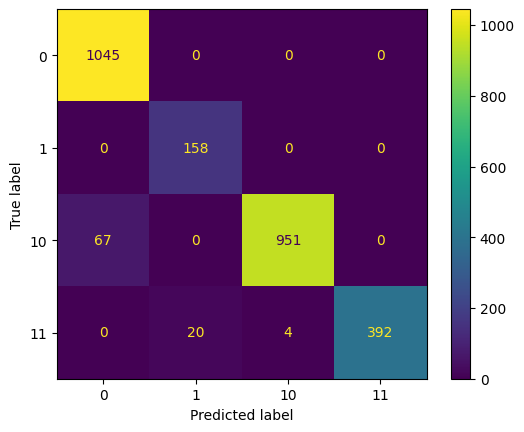

In [64]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

Так как мы имеем всего два признака в тестовой выборке, то можно визуализировать результат классификации на плоскости.

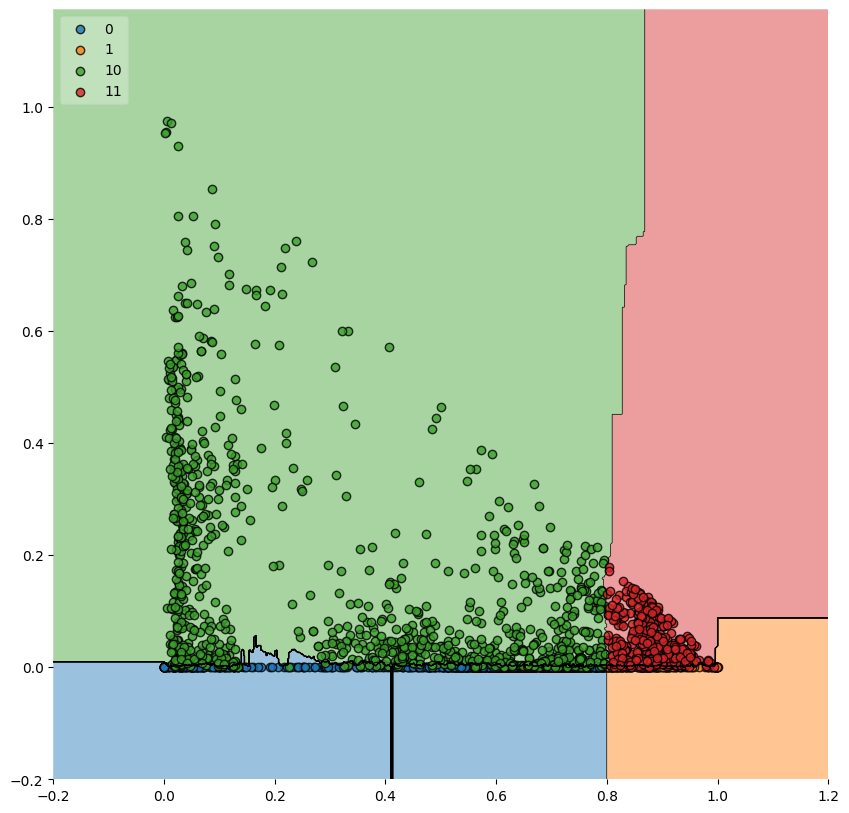

In [65]:
plt.figure(figsize=(10, 10))
plot_decision_regions(X_test_mm_5, y_test.to_numpy(), clf, zoom_factor=5.0, legend=2, markers="o");

Таким образом, благодаря использованию только двух основных и простейших признаков (воды и сахара), общая точность предсказания значительно возросла (на 5%). Данный результат является наилучшим из достигнутых в данной задаче.